# ***Importing Libraries***

In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=10)
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Load the dataset***

In [ ]:
#dataset=pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer_Project-main/Ovarian_Cancer_Project-main/ovariantotal.csv')
df=pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer_Project-main/Ovarian_Cancer_Project-main/ovariantotal.csv')
df.head()

AFP     AG  Age   ALB  ALP  ALT  AST  BASO#  BASO%   BUN  ...   PCT  \
0   3.58  19.36   47  45.4   56   11   24   0.01   0.30  5.35  ...  0.09   
1  34.24  23.98   61  39.9   95    9   13   0.02   0.30  3.21  ...  0.30   
2   1.50  18.40   39  45.4   77    9   18   0.03   0.60  3.80  ...  0.13   
3   2.75  16.60   45  39.2   26   16   17   0.05   0.74  5.27  ...  0.25   
4   2.36  19.97   45  35.0   47   21   27   0.01   0.10  4.89  ...  0.28   

    PDW  PHOS  PLT   RBC   RDW  TBIL    TP     UA  TYPE  
0  13.4  1.46   74  2.64  13.7   5.5  73.9  396.4     0  
1  11.2  1.09  304  4.89  12.7   6.8  72.0  119.2     0  
2  15.2  0.97  112  4.62  12.0  14.8  77.9  209.2     0  
3  17.4  1.25  339  4.01  14.6  10.9  66.1  215.6     0  
4  11.9  0.94  272  4.40  13.4   5.3  66.5  206.0     0  

[5 rows x 50 columns]

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X) #for numerical columns
X=imputer.transform(X)

df=pd.DataFrame(X)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['TYPE'], axis=1),
    df['TYPE'],
    test_size=0.2,
    random_state=1)

In [ ]:
X_train.head() 
X_train.shape

(279, 49)

In [ ]:
X_test.head()
X_test.shape

(70, 49)

In [ ]:
y_train.head()  
y_train.shape

(279,)

In [ ]:
y_test.shape


(70,)

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(49,49))
corr = pd.DataFrame(df).corr()
corr.style.background_gradient(cmap='coolwarm')

# ***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train)

[[-0.11385783  0.35333228 -1.20381935 ... -0.22333608  0.93395688
  -1.48378046]
 [-0.11046472  0.56391887  0.70077634 ... -1.17265783 -0.51697453
  -0.92525908]
 [-0.10839115  1.53902637  1.88293918 ... -0.87429956 -2.15426411
   0.69185515]
 ...
 [-0.10980494  0.22514913  0.37239777 ...  0.48187436  0.98720207
  -0.20275322]
 [-0.11470611 -0.46841324  0.43807349 ... -0.52169434  0.21514683
  -1.29381824]
 [-0.10744862  0.71270288  1.94861489 ... -1.09128739 -0.53028583
   0.60580389]]


In [ ]:
print(X_test)

[[-0.10499803 -0.17771218 -1.00679221 ...  0.86160305 -0.62346491
  -0.73854408]
 [-0.10839115  0.30755258 -0.08733222 ...  2.35339437  0.20183553
  -0.94961321]
 [-0.07907841  1.67178749 -0.21868365 ...  1.51256654 -0.74326658
  -0.63300952]
 ...
 [-0.10669459  1.42457714  1.29185776 ...  7.94083091 -0.22412599
   1.96314073]
 [-0.10905092  1.49553566  0.56942491 ... -0.82005261 -0.55690842
   1.37214718]
 [-0.111313   -1.45267668 -0.41571079 ... -0.1962126  -0.30399377
  -0.93662434]]


# ***RANDOM FORESTS***

In [ ]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

%matplotlib inline

In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

m_best = CV_rfc.best_estimator_ 
print(m_best)

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

RandomForestClassifier(max_depth=6, max_features='auto', n_estimators=200,
                       random_state=42)


In [ ]:
test_acc = accuracy_score(y_test, y_pred) 
print(precision_score(y_test,y_pred)) 
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred)) 


print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred)) 
print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))

'''print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)'''
    
pred_prob3 = m_best.predict_proba(X_test) 
print(classification_report(y_test,y_pred))

0.875
0.9210526315789473
0.8974358974358975
Training confusion matrix
[[135   4]
 [  0 140]]
Testing confusion matrix
[[27  5]
 [ 3 35]]
Train accuracy: 0.9857
Test accuracy: 0.8857
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.88      0.92      0.90        38

    accuracy                           0.89        70
   macro avg       0.89      0.88      0.88        70
weighted avg       0.89      0.89      0.89        70



# ***Logistic Regression***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
model_lr = GridSearchCV(lr, param_grid=grid_values)

model_lr.fit(X_train,y_train)

m_best = model_lr.best_estimator_

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test) 
print(y_pred) 



test_acc = accuracy_score(y_test, y_pred) 
print(precision_score(y_test,y_pred)) 
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))  
print(accuracy_score(y_test,y_pred))



print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))


    
pred_prob5 = m_best.predict_proba(X_test)  
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[1 1 0 ... 1 0 1]
0.8611111111111112
0.8157894736842105
0.8378378378378377
0.8285714285714286
Training confusion matrix
[[124  15]
 [  7 133]]
Testing confusion matrix
[[27  5]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.86      0.82      0.84        38

    accuracy                           0.83        70
   macro avg       0.83      0.83      0.83        70
weighted avg       0.83      0.83      0.83        70



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = m_best.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9259868421052632

<ipython-input-13-ba02e40565ca>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


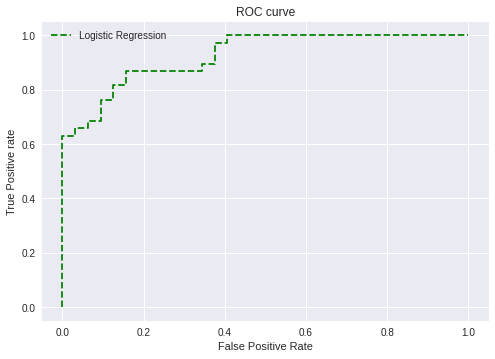

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=75a8ada9d511cd9bff34f7be79cfaf7089b82c326df99e30c46a686c7969b45c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
pip install sklearn.ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble


### ***XGBOOST***

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 4,
    verbose=True
)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

m_best = grid_search.best_estimator_ 
print(m_best)

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))


print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))


importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob2 = m_best.predict_proba(X_test) 

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(y_test,y_pred))

Fitting 4 folds for each of 96 candidates, totalling 384 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)
Train accuracy: 0.9642
Test accuracy: 0.8857
Precision: 0.8947
Recall: 0.8947
F1: 0.8947
Training confusion matrix
[[129  10]
 [  0 140]]
Testing confusion matrix
[[28  4]
 [ 4 34]]
0.020940276
0.0

## ***GRADIENT BOOSTING MACHINE***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import metrics 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot


In [ ]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)

baseline.fit(X_train, y_train)

gbm_predict_train = baseline.predict(X_train)

#get accuracy
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

#print accuracy
print ("GBM training Accuracy: {0:.4f}".format(gbm_accuracy))

gbm_predict_test = baseline.predict(X_test)

#get accuracy
gbm_accuracy_testdata = metrics.accuracy_score(y_test, gbm_predict_test)

#print accuracy
print ("GBM testing Accuracy: {0:.4f}".format(gbm_accuracy_testdata)) 
print(precision_score(y_test,y_pred)) 
print(f1_score(y_test, y_pred)) 
print(recall_score(y_test,y_pred))

from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbm_predict_test)
print ("GBM Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, gbm_predict_test)
print ("GBM AUC: {0:.4f}".format(auc))



#print('Training confusion matrix')
#print(confusion_matrix(y_train, gbm_predict_train))
#print('Testing confusion matrix')
#print(confusion_matrix(y_test, gbm_predict_test))

#print ("Confusion Matrix for GBM")

# labels for set 1=True to upper left and 0 = False to lower right
#print ("{0}".format(metrics.confusion_matrix(y_test, gbm_predict_test, labels=[1, 0])))

#print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, gbm_predict_test, labels=[1, 0])))


GBM training Accuracy: 1.0000
GBM testing Accuracy: 0.8714
0.8947368421052632
0.8947368421052632
0.8947368421052632
GBM Log Loss: 4.6342
GBM AUC: 0.8717
Classification Report

              precision    recall  f1-score   support

           1       0.89      0.87      0.88        38
           0       0.85      0.88      0.86        32

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



## ***LIGHT GRADIENT BOOSTING***

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics


In [ ]:
params = {
    'application': 'binary', 
    'boosting': 'gbdt', 
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', 
    'max_depth': -1, 
    'max_bin': 510, 
    'lambda_l1': 5, 
    'lambda_l2': 10, 
    'metric' : 'binary_error',
    'subsample_for_bin': 200, 
    'subsample': 1,
    'colsample_bytree': 0.8,
    'min_split_gain': 0.5, 
    'min_child_weight': 1, 
    'min_child_samples': 5
}

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin'])

In [ ]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt', 'dart'], 
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1) 
print(grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_bin=510, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_jobs=5, objective='binary', silent=True,
                                      subsample=1, subsample_for_bin=200),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.64, 0.65, 0.66],
                         'learning_rate': [0.005, 0.01], 'max_bin': [255, 510],
                         'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
                         'random_state': [500], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.7, 0.75]},
             verbose=1)
Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_bin=510, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_jobs=5, objective='binary', silent=True,
                                      subsample=1, subsample_for_bin=200),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.64, 0.65, 0.66],
                         'learning_rate': [0.005, 0.01], 'max_bin': [255, 510],
                         'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
                         'random_state': [500], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.7, 0.75]},
             verbose=1)

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test) 

watchlist = [d_train, d_test]

model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=4) 
print(params)

y_t = model.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

test_acc = metrics.accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss)) 
print (metrics.classification_report(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 140, number of negative: 139
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2350
[LightGBM] [Info] Number of data points in the train set: 279, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501792 -> initscore=0.007168
[LightGBM] [Info] Start training from score 0.007168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's binary_error: 0.0824373	valid_1's binary_error: 0.171429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

# ***Voting Classifier***

####Hard Voting

In [ ]:
estimator = []
estimator.append(('LR', LogisticRegression(random_state=1)))
estimator.append(('GBC', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('LGBM', lgb.LGBMClassifier())) 
estimator.append(('RF', RandomForestClassifier(n_estimators = 1000, random_state = 42)))

In [ ]:
from sklearn.ensemble import VotingClassifier
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred)) 
print(metrics.precision_score(y_test,y_pred)) 
print(metrics.f1_score(y_test, y_pred)) 

0.8857142857142857
0.8947368421052632
0.8947368421052632


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.89      0.89      0.89        38

    accuracy                           0.89        70
   macro avg       0.88      0.88      0.88        70
weighted avg       0.89      0.89      0.89        70



<AxesSubplot:>

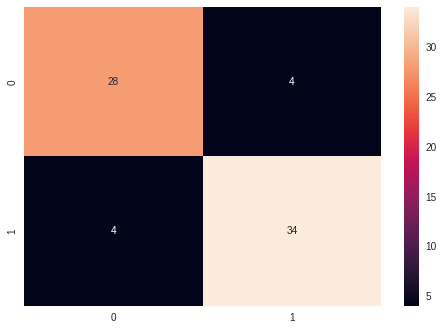

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)